# CO2 monitor comparison

CO2 covid project @ CMM & CATA

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

In [48]:
import os, sys

In [49]:
os.listdir("./data")

['Miguel_20210116.csv',
 'aranet4 ff_2021-01-17T19_19_06.csv',
 'Miguel_20210119_noche.csv']

In [50]:
filename = "data/aranet4 ff_2021-01-17T19_19_06.csv"
df = pd.read_csv(filename)
df.rename({"CO₂(ppm)": "CO2"}, axis=1, inplace=True)
df["Time"] = pd.to_datetime(df.Time)
df = df.sort_values("Time")
df

,Time,CO2,Temperature(°C),Humidity(%),Pressure(hPa)
0,2021-01-14 07:19:06,396,22.3,28,946
1,2021-01-14 07:20:06,417,22.3,28,946
2,2021-01-14 07:21:06,413,22.3,28,946
3,2021-01-14 07:22:06,399,22.3,28,946
4,2021-01-14 07:23:06,413,22.3,28,946
...,...,...,...,...,...
5035,2021-01-17 19:14:06,389,29.7,22,944
5036,2021-01-17 19:15:06,386,29.6,22,944
5037,2021-01-17 19:16:06,387,29.6,22,944
5038,2021-01-17 19:17:06,382,29.7,22,944


In [51]:
filename = "data/Miguel_20210116.csv"
df2 = pd.read_csv(filename)
df2.rename({"seconds": "Time"}, axis=1, inplace=True)
df2

,CO2,Time
0,481,0.00
1,481,0.99
2,473,1.98
3,464,2.97
4,460,3.96
...,...,...
1225,949,1212.75
1226,972,1213.74
1227,983,1214.73
1228,983,1215.72


(array([  8.,  21.,  50., 101., 117., 133.,  92.,  52.,  20.,   6.]),
 array([344., 349., 354., 359., 364., 369., 374., 379., 384., 389., 394.]),
 <a list of 10 Patch objects>)

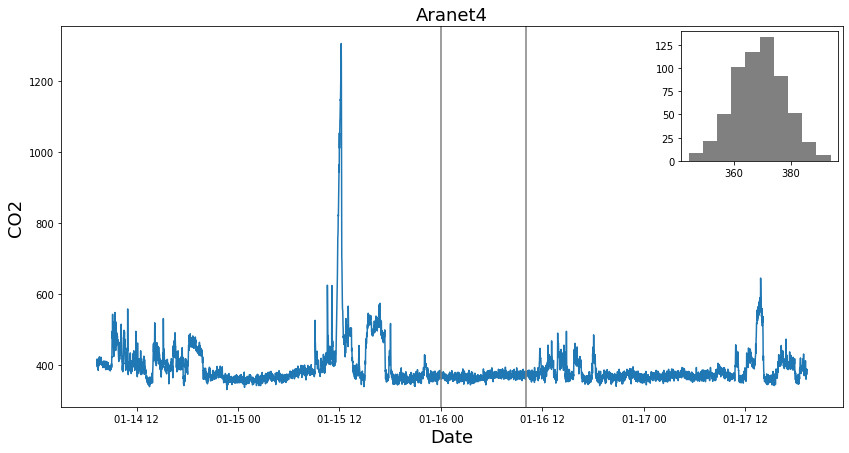

In [52]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df.Time, df["CO2"])
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("CO2", fontsize=18)
ax.set_title("Aranet4", fontsize=18)
tmin = pd.to_datetime("2021-01-16 00:00:00")
tmax = pd.to_datetime("2021-01-16 10:00:00")
ax.axvline(tmin, c='gray')
ax.axvline(tmax, c='gray')
inset = inset_axes(ax, 
                    width="20%", # width = 30% of parent_bbox
                    height=1.8, # height : 1 inch
                    loc=1)
inset.hist(df.loc[(df.Time > tmin) & (df.Time < tmax)]["CO2"], color='gray')

(array([17.,  8., 28., 44., 84., 34., 10.,  8., 11.,  8.]),
 array([643. , 655.5, 668. , 680.5, 693. , 705.5, 718. , 730.5, 743. ,
        755.5, 768. ]),
 <a list of 10 Patch objects>)

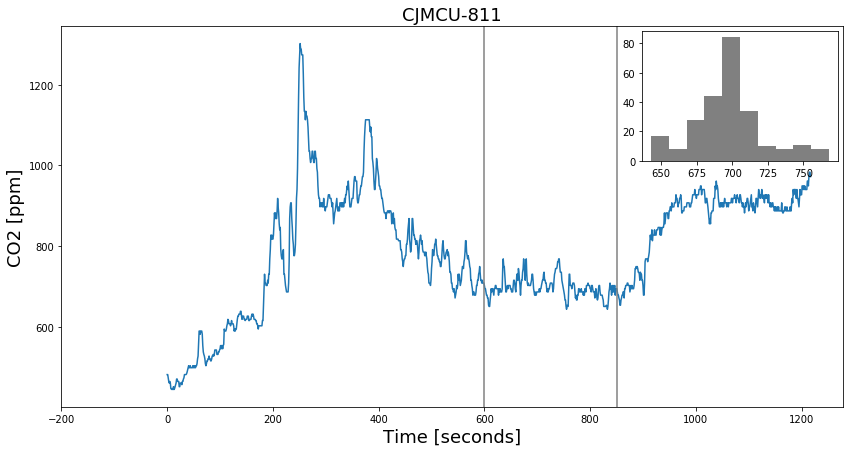

In [58]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df2.Time, df2["CO2"])
ax.set_xlabel("Time [seconds]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
ax.set_title("CJMCU-811", fontsize=18)
tmin = 600
tmax = 850
ax.axvline(tmin, c='gray')
ax.axvline(tmax, c='gray')
ax.set_xlim(-200, ax.get_xlim()[1])
inset = inset_axes(ax, 
                    width="25%", # width = 30% of parent_bbox
                    height=1.8, # height : 1 inch
                    loc=1)
inset.hist(df2.loc[(df2.Time > tmin) & (df2.Time < tmax)]["CO2"], color='gray')

In [53]:
filename = "data/Miguel_20210119_noche.csv"
df3 = pd.read_csv(filename)
df3.rename({"seconds": "Time"}, axis=1, inplace=True)
df3

,CO2,Time
0,400,0.00
1,400,0.99
2,400,1.98
3,400,2.97
4,400,3.96
...,...,...
2323,414,2299.77
2324,416,2300.76
2325,414,2301.75
2326,410,2302.74


(array([278., 156.,   0.,  97.,  35.,  30.,   9.,   0.,   0.,   1.]),
 array([400. , 401.6, 403.2, 404.8, 406.4, 408. , 409.6, 411.2, 412.8,
        414.4, 416. ]),
 <a list of 10 Patch objects>)

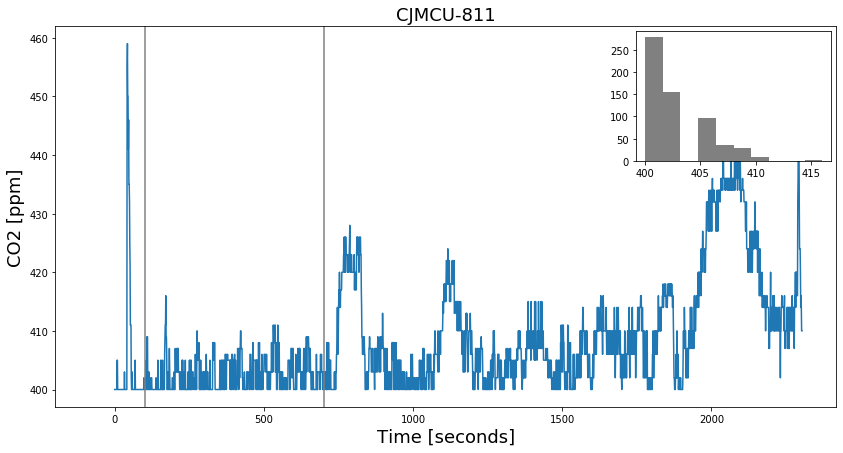

In [55]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df3.Time, df3["CO2"])
ax.set_xlabel("Time [seconds]", fontsize=18)
ax.set_ylabel("CO2 [ppm]", fontsize=18)
ax.set_title("CJMCU-811", fontsize=18)
tmin = 100
tmax = 700
ax.axvline(tmin, c='gray')
ax.axvline(tmax, c='gray')
ax.set_xlim(-200, ax.get_xlim()[1])
inset = inset_axes(ax, 
                    width="25%", # width = 30% of parent_bbox
                    height=1.8, # height : 1 inch
                    loc=1)
inset.hist(df3.loc[(df3.Time > tmin) & (df3.Time < tmax)]["CO2"], color='gray')